In [122]:
import pandas as pd
import os

data_dir = "../data/covidtracker/"
df = pd.DataFrame()
for f in [f for f in os.listdir(data_dir) if f.split(".")[-1] == "parquet"]:
    df = pd.concat([df, pd.read_parquet(f"{data_dir}/{f}")], axis=0)
display(df)

,date,data
0,2020-01-01,{'policyActions': [{'flag_value_display_field'...
0,2020-01-02,{'policyActions': [{'flag_value_display_field'...
0,2020-01-03,{'policyActions': [{'flag_value_display_field'...
0,2020-01-04,{'policyActions': [{'flag_value_display_field'...
0,2020-01-05,{'policyActions': [{'flag_value_display_field'...
...,...,...
0,2021-08-01,{'policyActions': [{'flag_value_display_field'...
0,2021-08-02,{'policyActions': [{'flag_value_display_field'...
0,2021-08-03,{'policyActions': [{'flag_value_display_field'...
0,2021-08-04,{'policyActions': [{'flag_value_display_field'...


In [2]:
from pprint import pprint
data = df[df["date"] == "2020-12-15"].data.to_list()[0]
pprint(data)

{'policyActions': array([{'flag_value_display_field': 'General', 'flagged': True, 'is_general': True, 'notes': None, 'policy_type_code': 'C1', 'policy_type_display': 'School closing', 'policy_value_display_field': 'Recommend closing', 'policyvalue': '1', 'policyvalue_actual': 1},
       {'flag_value_display_field': 'General', 'flagged': True, 'is_general': True, 'notes': '15 December\r\nThe Netherlands entered its strictest lockdown yet from 15 December until at least Tuesday 19 January. \r\n\r\nNon essential businesses closed- Only people in medical and paramedical contact-based professions can continue to carry out their work. \r\n\r\n\r\nhttps://web.archive.org/web/20210106111540/https://www.government.nl/topics/coronavirus-covid-19/news/2020/12/14/lockdown-in-order-to-minimise-contact-between-people\r\nr', 'policy_type_code': 'C2', 'policy_type_display': 'Workplace closing', 'policy_value_display_field': 'Require closing all but essential', 'policyvalue': '3', 'policyvalue_actual':

In [121]:
import yaml, re
#  for k, v in _.items() if k in ["notes", "policy_type_display", "policyvalue_actual"]


def list_government_measures()
def get_measure(df, date):
    def parse_data(data, grouping="policy_type_code", keys = ["notes", "policy_type_display", "policyvalue_actual"]):
        try:
            return [{_[grouping]: [{k: re.sub(r'((\r)|(\n)|(\\)|\s+)+', ' ', str(_[k]), flags=re.M)} for k in keys]} for _ in data["policyActions"] if _["notes"] is not None and _["notes"] != '']
        except:
            return None
    small_date = str(date)[:10]
    parsed_data = parse_data(df[df["date"] == small_date].data.to_list()[0])
    return {small_date: parsed_data} if parsed_data != [] else None
    
print(yaml.dump([get_measure(df, date) for date in df.date.to_list() if get_measure(df, date) is not None]))

- '2020-01-01':
  - C5:
    - notes: https://www.government.nl/topics/coronavirus-covid-19/tackling-new-coronavirus-in-the-netherlands
    - policy_type_display: Close public transport
    - policyvalue_actual: '0'
- '2020-01-27':
  - H2:
    - notes: "Tests will be conducted when a person has severe symptoms and has been\
        \ in contact with an infected person or has been in a high-risk area within\
        \ the last 14 days. Quote from policy brief from Health Minister Bruno Bruins:\
        \ \"Deze casusdefinitie is opgesteld met het doel om laagdrempelig pati\xEB\
        nten met het nieuwe coronavirus op te kunnen sporen. Als iemand verschijnselen\
        \ vertoont zoals ademhalingsproblemen, longklachten of koorts binnen 14 dagen\
        \ na terugkomst uit Wuhan of een nieuw gebied waar overdracht is gemeld of\
        \ contact heeft gehad met een pati\xEBnt met 2019-nCoV wordt diagnostiek ingesteld.\"\
        \ Source: https://web.archive.org/web/20210418223946/ht

In [29]:
data["policyActions"][1]

{'flag_value_display_field': 'General',
 'flagged': True,
 'is_general': True,
 'notes': '15 December\r\nThe Netherlands entered its strictest lockdown yet from 15 December until at least Tuesday 19 January. \r\n\r\nNon essential businesses closed- Only people in medical and paramedical contact-based professions can continue to carry out their work. \r\n\r\n\r\nhttps://web.archive.org/web/20210106111540/https://www.government.nl/topics/coronavirus-covid-19/news/2020/12/14/lockdown-in-order-to-minimise-contact-between-people\r\nr',
 'policy_type_code': 'C2',
 'policy_type_display': 'Workplace closing',
 'policy_value_display_field': 'Require closing all but essential',
 'policyvalue': '3',
 'policyvalue_actual': 3}

In [53]:
from utils import to_snake_case

pd.set_option('display.max_columns', None)
df = df.set_index("date")
df = pd.concat([df.drop(['data'], axis=1), df['data'].apply(pd.Series)], axis=1)
df = pd.concat([df.drop(['stringencyData'], axis=1), df['stringencyData'].apply(pd.Series)], axis=1)
df = df.explode("policyActions")
df = pd.concat([df.drop(['policyActions'], axis=1), df['policyActions'].apply(pd.Series)], axis=1)
df = df[(~df["notes"].isna()) & (df["policyvalue_actual"] > 0)]
df["date"] = df.index
df["date"] = df["date"].astype("str").apply(lambda x: str(x)[:10])
df = df.pivot(index=["date"], columns=["policy_type_code"], values=["policyvalue_actual", "stringency_actual"])
df.columns = [f"{_[1].lower()}_{to_snake_case(_[0].replace('.','_'))}" for _ in df.columns]
df.index = df.index.astype('datetime64[ns]')
display(df)

,c1_policyvalue_actual,c2_policyvalue_actual,c3_policyvalue_actual,c4_policyvalue_actual,c5_policyvalue_actual,c6_policyvalue_actual,c7_policyvalue_actual,c8_policyvalue_actual,e1_policyvalue_actual,e2_policyvalue_actual,e3_policyvalue_actual,e4_policyvalue_actual,h1_policyvalue_actual,h2_policyvalue_actual,h3_policyvalue_actual,h4_policyvalue_actual,h5_policyvalue_actual,h6_policyvalue_actual,h7_policyvalue_actual,h8_policyvalue_actual,v1_policyvalue_actual,v2_policyvalue_actual,v3_policyvalue_actual,c1_stringency_actual,c2_stringency_actual,c3_stringency_actual,c4_stringency_actual,c5_stringency_actual,c6_stringency_actual,c7_stringency_actual,c8_stringency_actual,e1_stringency_actual,e2_stringency_actual,e3_stringency_actual,e4_stringency_actual,h1_stringency_actual,h2_stringency_actual,h3_stringency_actual,h4_stringency_actual,h5_stringency_actual,h6_stringency_actual,h7_stringency_actual,h8_stringency_actual,v1_stringency_actual,v2_stringency_actual,v3_stringency_actual
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,NaN,5.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,NaN,NaN,NaN
2020-03-10,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.83,20.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-03,1.0,1.0,1.0,NaN,NaN,NaN,NaN,3.0,2.0,1.0,NaN,NaN,2.0,2.0,1.0,NaN,NaN,2.0,5.0,1.0,NaN,NaN,NaN,32.41,32.41,32.41,NaN,NaN,NaN,NaN,32.41,32.41,32.41,NaN,NaN,32.41,32.41,32.41,NaN,NaN,32.41,32.41,32.41,NaN,NaN,NaN
2021-07-10,1.0,2.0,1.0,NaN,NaN,NaN,NaN,3.0,2.0,1.0,NaN,NaN,2.0,2.0,1.0,NaN,NaN,2.0,5.0,1.0,2501.0,NaN,NaN,36.11,36.11,36.11,NaN,NaN,NaN,NaN,36.11,36.11,36.11,NaN,NaN,36.11,36.11,36.11,NaN,NaN,36.11,36.11,36.11,36.11,NaN,NaN
2021-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2714.0,2714.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.11,36.11


In [54]:
stringency_cols = [col for col in df.columns if "stringency" in col]
df["stringency_actual"] = df[stringency_cols].max(axis=1)
df = df.drop(stringency_cols, axis=1)
display(df)

,c1_policyvalue_actual,c2_policyvalue_actual,c3_policyvalue_actual,c4_policyvalue_actual,c5_policyvalue_actual,c6_policyvalue_actual,c7_policyvalue_actual,c8_policyvalue_actual,e1_policyvalue_actual,e2_policyvalue_actual,e3_policyvalue_actual,e4_policyvalue_actual,h1_policyvalue_actual,h2_policyvalue_actual,h3_policyvalue_actual,h4_policyvalue_actual,h5_policyvalue_actual,h6_policyvalue_actual,h7_policyvalue_actual,h8_policyvalue_actual,v1_policyvalue_actual,v2_policyvalue_actual,v3_policyvalue_actual,stringency_actual
date,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56
2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11
2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,11.11
2020-03-10,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-03,1.0,1.0,1.0,NaN,NaN,NaN,NaN,3.0,2.0,1.0,NaN,NaN,2.0,2.0,1.0,NaN,NaN,2.0,5.0,1.0,NaN,NaN,NaN,32.41
2021-07-10,1.0,2.0,1.0,NaN,NaN,NaN,NaN,3.0,2.0,1.0,NaN,NaN,2.0,2.0,1.0,NaN,NaN,2.0,5.0,1.0,2501.0,NaN,NaN,36.11
2021-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2714.0,2714.0,36.11


In [55]:
import yaml

ModuleNotFoundError: No module named 'yaml'

In [96]:
test_str = """15 December\r\nThe Netherlands entered its strictest lockdown yet from 15\
    \ December until at least Tuesday 19 January. \r\n\r\nNon essential businesses\
    \ closed- Only people in medical and paramedical contact-based professions can\
    \ continue to carry out their work. \r\n\r\n\r\nhttps://web.archive.org/web/20210106111540/https://www.government.nl/topics/coronavirus-covid-19/news/2020/12/14/lockdown-in-order-to-minimise-contact-between-people\r\
    \nr"""

re.sub(r'((\r)|(\n)|(\\)|\s+)+', ' ', test_str, flags=re.M)

'15 December The Netherlands entered its strictest lockdown yet from 15 December until at least Tuesday 19 January. Non essential businesses closed- Only people in medical and paramedical contact-based professions can continue to carry out their work. https://web.archive.org/web/20210106111540/https://www.government.nl/topics/coronavirus-covid-19/news/2020/12/14/lockdown-in-order-to-minimise-contact-between-people r'

In [32]:
from utils import *

print(list_government_measures(["2020-12-16"]))

- '2020-12-16':
  - C1:
    - notes: 15 December The Netherlands entered its strictest lockdown yet from 15
        December until at least Tuesday 19 January. Primary and secondary schools,
        schools for secondary vocation education (MBO) and higher education institutions
        (universities and HBO) will deliver teaching online in order to reduce in-person
        contact. They may make exceptions for those sitting exams and interim exams
        this academic year, as well as for practical training and to support vulnerable
        pupils and students. In order to allow enough time to make preparations, the
        measures for schools, educational institutions and childcare centres will
        apply from Wednesday 16 December. They will be in place until Sunday 17 January.
        https://web.archive.org/web/20210106111540/https://www.government.nl/topics/coronavirus-covid-19/news/2020/12/14/lockdown-in-order-to-minimise-contact-between-people
    - policy_type_display: Sc

In [1]:
%run run.py -p "d" --all_stocks "true"

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=175.105, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=221.733, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=188.019, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=199.504, Time=0.53 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=181.168, Time=0.62 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=173.501, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=185.362, Time=0.60 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=180.320, Time=0.55 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=175.280, Time=0.65 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=175.488, Time=0.62 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=175.260, Time=0.68 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 6.223 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=105.920, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=135.172, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=100.386, Time=0.54 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=101.807, Time=0.52 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=101.887, Time=0.56 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=101.956, Time=0.61 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=103.775, Time=0.64 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.668 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=34.423, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=144.804, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=27.697, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=102.331, Time=0.53 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=19.826, Time=0.57 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=38.092, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=20.308, Time=0.60 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=20.552, Time=0.62 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=24.980, Time=0.67 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 4.926 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1.129, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=108.821, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2.543, Time=0.53 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=67.203, Time=0.53 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-11.952, Time=0.62 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=34.030, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1.921, Time=0.56 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-8.742, Time=0.63 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=13.868, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4.079, Time=0.67 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-8.091, Time=0.74 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 6.310 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=115.067, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=190.487, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=125.056, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=139.873, Time=0.54 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=115.567, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=116.982, Time=0.62 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=116.657, Time=0.63 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=106.785, Time=0.69 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=108.311, Time=0.61 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=109.703, Time=0.70 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=109.325, Time=0.68 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=110.422, Time=0.70 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=113.534, Time=0.72 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 7.753 seconds
Performing stepwis

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=325.374, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=380.506, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=327.194, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.56 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=323.861, Time=0.62 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=321.190, Time=0.61 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=326.220, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=328.535, Time=0.57 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.63 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 4.914 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=222.739, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=264.896, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=215.831, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=240.808, Time=0.53 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=216.384, Time=0.55 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=217.536, Time=0.56 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=215.377, Time=0.58 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=218.137, Time=0.67 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=209.861, Time=0.60 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=231.251, Time=0.56 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=214.103, Time=0.67 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=215.479, Time=0.62 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.69 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 7.402 seconds
Performing stepwise se

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=30.122, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=90.274, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=42.742, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=61.858, Time=0.52 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=23.877, Time=0.62 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=33.719, Time=0.68 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=41.982, Time=0.56 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=24.655, Time=0.64 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=30.801, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=45.627, Time=0.60 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=26.310, Time=0.72 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 6.384 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=123.778, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=152.770, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=125.459, Time=0.57 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=124.021, Time=0.59 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=121.940, Time=0.65 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=120.875, Time=0.59 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=122.177, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=122.001, Time=0.56 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.65 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 5.166 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=239.498, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=337.253, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=240.156, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.54 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=239.545, Time=0.62 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=240.715, Time=0.59 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=238.427, Time=0.72 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=240.591, Time=0.63 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=247.073, Time=0.76 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=243.152, Time=0.72 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.71 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=242.551, Time=0.66 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=244.234, Time=0.73 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 8.002 seconds
Performing stepwise search

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=391.791, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=416.669, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=399.643, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=400.359, Time=0.53 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.63 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=402.476, Time=0.56 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=401.124, Time=0.66 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=400.408, Time=0.58 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.65 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.65 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.78 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 7.168 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=109.919, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=167.629, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=113.654, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=149.368, Time=0.55 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=97.607, Time=0.64 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=116.769, Time=0.58 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=114.213, Time=0.59 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=98.117, Time=0.67 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=108.716, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=116.656, Time=0.62 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=98.950, Time=0.71 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 6.402 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=225.100, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=254.220, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=238.120, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=247.101, Time=0.54 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.63 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=237.816, Time=0.64 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=236.456, Time=0.69 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=228.339, Time=0.77 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=240.197, Time=0.65 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.74 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=237.570, Time=0.76 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 7.497 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-252.152, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-232.221, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-251.259, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-244.157, Time=0.53 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-247.557, Time=0.65 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-244.398, Time=0.70 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-244.508, Time=0.70 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-249.814, Time=0.61 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-246.107, Time=0.69 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-246.523, Time=0.73 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-242.501, Time=0.73 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 7.611 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=391.105, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=320.223, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=372.727, Time=0.55 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=318.906, Time=0.61 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=318.254, Time=0.61 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=318.992, Time=0.64 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=322.235, Time=0.66 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=324.363, Time=0.57 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=321.279, Time=0.68 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]          
Total fit time: 5.642 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=545.025, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=580.732, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=538.816, Time=0.48 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=560.884, Time=0.62 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=545.426, Time=0.56 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=545.284, Time=0.68 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=544.920, Time=0.66 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.872 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=14.081, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=88.443, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=10.479, Time=0.53 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=59.888, Time=0.55 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=11.068, Time=0.58 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=11.672, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=14.718, Time=0.60 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.894 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=147.883, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=177.583, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=138.125, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=140.262, Time=0.56 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=135.254, Time=0.56 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=136.746, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=133.345, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=133.877, Time=0.58 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=137.531, Time=0.64 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=132.141, Time=0.59 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=131.859, Time=0.60 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=133.145, Time=0.60 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.70 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 7.623 seconds
Performing stepwise se

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=232.808, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=367.084, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=234.318, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.61 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=228.397, Time=0.65 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=288.316, Time=0.60 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=224.767, Time=0.66 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=227.602, Time=0.70 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=227.669, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 5.220 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=308.473, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=259.123, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.54 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=259.259, Time=0.55 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=259.454, Time=0.58 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.58 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.669 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=235.071, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=281.621, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=240.159, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=263.642, Time=0.54 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=239.504, Time=0.68 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=237.462, Time=0.61 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=242.199, Time=0.67 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=238.522, Time=0.56 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=243.796, Time=0.64 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=238.365, Time=0.66 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.72 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 7.091 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=159.669, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=227.474, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=167.856, Time=0.53 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=192.119, Time=0.54 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=157.676, Time=0.63 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=170.989, Time=0.57 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=157.534, Time=0.57 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=158.127, Time=0.62 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=155.780, Time=0.56 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=156.425, Time=0.74 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=160.024, Time=0.64 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 6.365 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-118.875, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-61.076, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-131.468, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-101.613, Time=0.60 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-137.526, Time=0.55 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-131.759, Time=0.58 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-130.366, Time=0.68 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-135.484, Time=0.55 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-133.093, Time=0.66 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 4.999 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=9.498, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=77.684, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=8.369, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=40.153, Time=0.52 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7.404, Time=0.57 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=9.547, Time=0.58 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=0.739, Time=0.69 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5.921, Time=0.57 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3.042, Time=0.70 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=7.936, Time=0.70 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=13.840, Time=0.70 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 6.434 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=304.995, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=347.636, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=313.489, Time=0.57 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=327.230, Time=0.59 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.65 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=313.283, Time=0.66 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=313.289, Time=0.65 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=315.438, Time=0.60 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.61 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=311.776, Time=0.72 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=314.124, Time=0.71 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 7.472 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=276.573, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=343.718, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=288.416, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=327.097, Time=0.52 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=278.678, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=284.298, Time=0.59 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=293.547, Time=0.69 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.78 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=288.205, Time=0.58 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.63 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=283.156, Time=0.65 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=284.289, Time=0.78 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 7.143 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=179.338, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=303.508, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=184.819, Time=0.53 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=262.463, Time=0.55 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=179.053, Time=0.64 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=216.042, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=178.185, Time=0.73 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=180.325, Time=0.65 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=176.865, Time=0.62 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=178.836, Time=0.66 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=181.097, Time=0.71 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 6.695 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-3.831, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=86.483, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-4.338, Time=0.53 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=51.423, Time=0.58 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-7.575, Time=0.69 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-3.800, Time=0.64 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-0.832, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-6.145, Time=0.64 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-6.159, Time=0.76 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 5.314 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=46.797, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=101.926, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=43.226, Time=0.54 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=69.059, Time=0.57 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=43.511, Time=0.56 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=44.416, Time=0.63 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=46.557, Time=0.64 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.904 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=134.869, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=229.643, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=134.835, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=194.934, Time=0.57 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=133.534, Time=0.69 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=129.100, Time=0.82 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=131.419, Time=0.72 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=132.110, Time=0.71 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=138.558, Time=0.63 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=133.237, Time=0.78 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]          
Total fit time: 6.302 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=253.105, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=388.550, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=266.298, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.55 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=261.469, Time=0.63 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=253.871, Time=0.60 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.65 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=253.033, Time=0.67 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=262.102, Time=0.70 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.69 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=0.75 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 8.111 seconds
Performing stepwise search to minimize aic

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=252.257, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=366.510, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=267.933, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=333.868, Time=0.55 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=250.448, Time=0.67 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=300.889, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=249.838, Time=0.58 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=250.563, Time=0.63 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=246.100, Time=0.57 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=249.502, Time=0.56 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=250.382, Time=0.67 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 6.165 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=66.008, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=102.545, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=58.505, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=67.987, Time=0.52 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=59.994, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=59.934, Time=0.55 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=62.318, Time=0.58 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.657 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=126.550, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=234.905, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=146.199, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=187.276, Time=0.55 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=124.965, Time=0.62 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=164.098, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=123.100, Time=0.55 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=125.187, Time=0.65 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=120.246, Time=0.54 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=121.832, Time=0.63 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=127.516, Time=0.66 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 6.098 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=195.422, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=226.669, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=201.566, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=199.047, Time=0.57 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=194.898, Time=0.63 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=206.293, Time=0.54 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=196.100, Time=0.59 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.67 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.65 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=200.035, Time=0.63 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=178.151, Time=0.64 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.69 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.84 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.72 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=189.207, Time=0.67 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=183

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=391.791, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=416.669, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=399.643, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=400.359, Time=0.53 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=402.476, Time=0.57 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=401.124, Time=0.67 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=400.408, Time=0.58 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.67 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.67 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.79 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 7.245 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=120.484, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=202.519, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=119.343, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=181.526, Time=0.53 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=117.491, Time=0.56 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=116.391, Time=0.63 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=114.346, Time=0.66 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=116.002, Time=0.73 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=117.390, Time=0.78 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=121.100, Time=0.80 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=120.090, Time=0.73 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(4,0,0)(0,0,0)[0]          
Total fit time: 6.749 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=106.605, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=180.837, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=105.252, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=142.786, Time=0.59 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=106.823, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=106.672, Time=0.57 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=113.412, Time=0.62 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.851 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-238.000, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-205.880, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-239.460, Time=0.63 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-215.895, Time=0.80 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-230.376, Time=0.76 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-239.197, Time=0.87 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-227.261, Time=0.86 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 4.893 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=167.822, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=237.556, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=176.474, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=192.718, Time=0.53 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=165.766, Time=0.63 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=166.875, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=165.798, Time=0.91 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=167.757, Time=1.12 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=168.293, Time=0.95 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=165.899, Time=1.07 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=169.823, Time=0.93 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 8.180 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=617.802, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=635.121, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=595.254, Time=0.59 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=619.418, Time=0.62 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=603.236, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=606.264, Time=0.63 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.70 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 4.166 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-13.262, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=38.432, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-19.207, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5.687, Time=0.57 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-17.210, Time=0.57 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-17.270, Time=0.67 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-14.954, Time=0.85 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 4.196 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=121.313, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=177.740, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=117.188, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=154.847, Time=0.62 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=117.437, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=118.150, Time=0.62 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=119.379, Time=0.92 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 4.304 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=146.768, Time=0.93 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=233.320, Time=0.37 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=159.920, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=190.157, Time=0.57 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=144.960, Time=0.96 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=151.671, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=143.408, Time=0.69 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=145.087, Time=0.75 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=151.321, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 6.262 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=182.309, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=207.063, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=184.581, Time=0.54 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=197.269, Time=0.57 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=182.879, Time=0.70 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=184.781, Time=0.66 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=175.725, Time=0.75 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=179.387, Time=0.73 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=178.580, Time=0.74 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=177.300, Time=1.06 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=187.633, Time=0.72 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=181.748, Time=0.73 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=178.672, Time=0.85 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 8.948 seconds
Performing stepwis

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=251.702, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=308.739, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=251.433, Time=0.68 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=281.750, Time=0.67 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=251.937, Time=0.68 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=252.303, Time=0.68 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=255.399, Time=0.71 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 4.417 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=222.265, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=186.549, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=182.909, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=174.947, Time=0.89 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=176.229, Time=0.79 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=177.381, Time=0.72 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=170.955, Time=0.56 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=168.430, Time=0.72 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=170.041, Time=0.83 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=176.906, Time=0.70 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.97 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(0,0,3)(0,0,0)[0]          
Total fit time: 8.281 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-148.801, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-113.560, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-153.451, Time=0.66 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-135.531, Time=0.68 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-151.225, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-151.772, Time=0.77 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-150.359, Time=0.69 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 4.546 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=44.221, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=99.505, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=53.276, Time=0.75 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=48.404, Time=0.68 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=44.066, Time=0.74 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=42.910, Time=0.77 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=43.361, Time=0.70 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=43.005, Time=0.69 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=43.757, Time=0.83 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 6.186 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=295.231, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=326.610, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=312.597, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=318.014, Time=0.54 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.67 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=313.779, Time=0.65 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=319.763, Time=0.88 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.83 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=296.472, Time=0.65 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.88 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=305.600, Time=0.95 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.82 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 8.363 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=175.105, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=221.733, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=188.019, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=199.504, Time=0.56 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=181.168, Time=0.70 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=173.501, Time=0.67 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=185.362, Time=0.77 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=180.320, Time=0.73 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=175.280, Time=0.92 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=175.488, Time=0.74 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=175.260, Time=0.79 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 7.342 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=117.523, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=165.828, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=124.083, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=131.307, Time=0.62 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=116.880, Time=0.86 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=120.836, Time=0.57 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=114.749, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=115.994, Time=0.65 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=118.376, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 5.432 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=53.690, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=77.982, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=48.224, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=58.565, Time=0.57 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=49.592, Time=0.56 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=49.980, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=51.708, Time=0.61 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.655 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=23.781, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=76.871, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=21.880, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=49.868, Time=0.69 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=17.549, Time=0.58 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=16.145, Time=0.64 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=14.326, Time=0.81 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=17.116, Time=0.80 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=15.975, Time=0.89 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=19.682, Time=0.70 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=17.388, Time=0.78 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(4,0,0)(0,0,0)[0]          
Total fit time: 7.229 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=130.812, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=185.357, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=137.813, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=145.349, Time=0.58 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=138.943, Time=0.65 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=133.690, Time=0.62 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=133.915, Time=0.87 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.39 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=137.888, Time=0.73 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=132.330, Time=0.73 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=138.814, Time=0.73 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.83 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 8.545 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=299.727, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=358.201, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=300.144, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.61 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=300.207, Time=0.64 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=299.181, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=298.906, Time=0.59 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=297.938, Time=0.65 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=299.811, Time=0.65 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=302.234, Time=0.73 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 6.517 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=206.105, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=221.796, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=208.917, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=215.920, Time=0.60 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=209.044, Time=0.65 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.71 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=208.199, Time=0.73 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.83 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=210.047, Time=0.61 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=200.840, Time=0.71 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.70 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=209.749, Time=0.59 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Ti

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=106.594, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=181.991, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=98.670, Time=0.53 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=133.438, Time=0.70 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=99.520, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=111.371, Time=0.64 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=105.623, Time=0.60 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 4.065 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=165.258, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=210.530, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=179.762, Time=0.53 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=188.945, Time=0.55 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=167.160, Time=0.63 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=166.721, Time=0.61 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=173.793, Time=0.83 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.80 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=164.701, Time=0.67 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=191.190, Time=0.66 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=169.302, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 6.820 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=117.299, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=155.604, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=121.004, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=122.966, Time=0.59 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=114.440, Time=0.65 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=106.920, Time=0.82 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=116.319, Time=0.75 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=113.885, Time=0.60 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=117.865, Time=0.64 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 5.635 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=575.258, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=501.399, Time=0.62 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=519.407, Time=0.71 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=521.855, Time=0.71 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=543.994, Time=0.61 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=502.487, Time=0.57 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 5.550 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=108.829, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=183.420, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=116.405, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=137.702, Time=0.53 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=108.256, Time=0.62 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=123.025, Time=0.56 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=105.691, Time=0.56 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=106.789, Time=0.64 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=105.142, Time=0.57 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=106.452, Time=0.63 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=107.279, Time=0.74 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 6.273 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=119.814, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=197.803, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=124.822, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=162.599, Time=0.56 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=119.452, Time=0.65 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=143.116, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=126.512, Time=0.64 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=129.300, Time=0.75 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=133.668, Time=0.61 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=125.544, Time=0.65 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=118.602, Time=0.76 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=123.953, Time=0.68 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.89 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.75 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=118.377, Time=0.71 sec
 ARIMA(3,0,1)(0,0,0)[0]          

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-125.238, Time=0.96 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-100.198, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-133.439, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-106.114, Time=0.59 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-125.167, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-124.984, Time=0.63 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-118.051, Time=0.65 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 4.309 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=202.771, Time=0.82 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=327.852, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=229.356, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=267.809, Time=0.56 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=206.640, Time=0.69 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=205.934, Time=0.64 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=203.363, Time=0.88 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=208.074, Time=0.89 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=202.845, Time=0.57 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=207.694, Time=0.70 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=205.683, Time=0.72 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.77 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 7.943 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=603.136, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=584.842, Time=0.57 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=590.338, Time=0.61 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=590.334, Time=0.61 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=589.790, Time=0.65 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.75 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 4.058 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-39.478, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=23.743, Time=0.33 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-29.605, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-18.508, Time=0.53 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-44.463, Time=0.64 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-45.863, Time=0.58 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-43.111, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-47.138, Time=0.58 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-45.709, Time=0.64 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-47.027, Time=0.58 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 5.728 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=139.817, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=176.212, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=139.251, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=151.043, Time=0.59 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=139.421, Time=0.61 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=140.165, Time=0.57 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=139.850, Time=0.63 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.753 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=127.856, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=198.742, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=144.817, Time=0.54 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=145.251, Time=0.57 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=127.459, Time=0.68 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=122.793, Time=0.63 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=127.123, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=125.354, Time=0.59 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=129.263, Time=0.72 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 5.336 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=298.519, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=272.366, Time=0.53 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=281.943, Time=0.53 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=269.003, Time=0.54 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=270.974, Time=0.58 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=270.995, Time=0.56 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=269.835, Time=0.56 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=272.366, Time=0.65 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 4.790 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=213.889, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=273.160, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=223.924, Time=0.53 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=234.534, Time=0.58 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=216.985, Time=0.67 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=214.902, Time=0.65 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=217.054, Time=0.68 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=214.763, Time=0.75 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=220.527, Time=0.66 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=216.528, Time=0.81 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=214.761, Time=0.71 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=216.041, Time=0.74 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 7.643 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=211.650, Time=0.83 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=277.702, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=211.535, Time=0.75 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=232.117, Time=0.61 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=208.734, Time=0.62 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=209.200, Time=0.63 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=210.040, Time=0.58 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=210.406, Time=0.57 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=210.993, Time=0.65 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 5.475 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-123.436, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-89.992, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-129.990, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-116.854, Time=0.57 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-128.422, Time=0.58 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-128.737, Time=0.58 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.796 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=142.493, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=160.044, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=136.479, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=152.239, Time=0.56 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=138.465, Time=0.58 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=138.474, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=137.233, Time=0.64 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.682 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=438.584, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=496.040, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=412.116, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.56 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=408.802, Time=0.56 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=436.670, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=437.587, Time=0.70 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 5.110 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=234.554, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=236.815, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=234.593, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=236.107, Time=0.52 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=232.625, Time=0.63 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=231.578, Time=0.59 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=232.820, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=236.244, Time=0.57 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 4.968 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=56.566, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=131.845, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=55.628, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=95.006, Time=0.65 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=52.960, Time=0.58 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=54.212, Time=0.64 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=46.232, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=47.357, Time=0.61 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=48.705, Time=0.66 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=49.714, Time=0.61 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=50.347, Time=0.80 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 6.552 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-28.054, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=27.669, Time=0.42 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-17.419, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-11.933, Time=0.57 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-27.106, Time=0.62 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-28.262, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-31.506, Time=0.59 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-37.894, Time=0.55 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-34.659, Time=0.61 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-32.315, Time=0.68 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 5.941 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-13.362, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=70.841, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-18.104, Time=0.48 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=27.121, Time=0.54 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-18.329, Time=0.65 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-14.618, Time=0.62 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-17.456, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-20.444, Time=0.60 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-17.962, Time=0.64 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=0.121, Time=0.60 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 5.624 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=153.165, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=198.909, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=157.007, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=172.624, Time=0.52 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=149.892, Time=0.60 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=167.046, Time=0.60 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=158.243, Time=0.57 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=153.879, Time=0.65 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=157.476, Time=0.65 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=160.773, Time=0.69 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=154.440, Time=0.73 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 6.420 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=283.248, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=329.779, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=286.794, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=294.816, Time=0.56 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=283.059, Time=0.61 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=278.688, Time=0.60 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=281.416, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=283.672, Time=0.64 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=284.282, Time=0.67 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 5.138 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=233.320, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=262.892, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=246.771, Time=0.59 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=257.740, Time=0.55 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=231.606, Time=0.61 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.57 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=247.576, Time=0.55 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=233.411, Time=0.66 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=239.618, Time=0.64 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=245.107, Time=0.66 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.67 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 6.298 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=171.421, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=116.716, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=130.371, Time=0.54 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=113.580, Time=0.56 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=115.626, Time=0.68 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=123.577, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=116.447, Time=0.61 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=117.437, Time=0.72 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 5.274 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=100.919, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=150.485, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=108.348, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=127.742, Time=0.62 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=99.607, Time=0.62 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=102.990, Time=0.61 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=107.770, Time=0.59 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=103.348, Time=0.64 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=100.885, Time=0.64 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=109.811, Time=0.68 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=102.890, Time=0.69 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 6.606 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=77.499, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=117.605, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=81.586, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=78.132, Time=0.53 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=76.341, Time=0.61 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=72.704, Time=0.60 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=80.416, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=73.553, Time=0.59 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 5.087 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=397.370, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=421.909, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=401.455, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=410.473, Time=0.59 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=398.300, Time=0.63 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=397.996, Time=0.60 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.71 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=385.874, Time=0.74 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.77 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.80 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=0.84 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 8.504 seconds
Performing stepwise search to minimize aic

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=83.691, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=156.685, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=90.678, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=117.111, Time=0.59 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=80.373, Time=0.67 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=94.893, Time=0.61 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=91.654, Time=0.58 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=82.848, Time=0.76 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=86.452, Time=0.62 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=93.815, Time=0.58 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=83.612, Time=0.70 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 6.639 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=93.695, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=184.866, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=109.947, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=125.674, Time=0.55 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=91.894, Time=0.64 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=110.033, Time=0.60 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=91.182, Time=0.58 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=101.467, Time=0.63 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=98.486, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 5.107 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-198.997, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-134.033, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-199.945, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-173.353, Time=0.56 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-198.880, Time=0.55 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-202.607, Time=0.64 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-202.463, Time=0.68 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-201.408, Time=0.63 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-187.952, Time=0.80 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 5.254 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=321.760, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=268.596, Time=0.54 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=309.004, Time=0.59 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=269.040, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=269.375, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.60 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.792 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=734.299, Time=0.74 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=768.569, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=696.561, Time=0.62 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=737.960, Time=0.63 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=717.308, Time=0.69 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=717.807, Time=0.72 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 4.211 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=0.165, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=91.732, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7.317, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=57.184, Time=0.57 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-3.973, Time=0.73 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=42.211, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-2.561, Time=0.62 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-8.386, Time=0.70 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=16.861, Time=0.63 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-8.981, Time=0.79 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-4.463, Time=0.78 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-5.887, Time=0.76 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-9.157, Time=0.78 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=7.766, Time=0.66 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=-3.470, Time=0.86 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=1

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=111.118, Time=0.74 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=173.059, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=106.733, Time=0.53 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=137.726, Time=0.52 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=107.345, Time=0.55 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=106.565, Time=0.58 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=108.248, Time=0.67 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=111.244, Time=0.65 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=127.561, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 5.083 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=251.844, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=356.129, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=262.543, Time=0.58 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=316.514, Time=0.58 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=258.547, Time=0.73 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=258.675, Time=0.67 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=252.017, Time=0.76 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=250.126, Time=0.80 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=251.848, Time=0.72 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=257.235, Time=0.70 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=262.253, Time=0.79 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=261.350, Time=0.83 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 8.883 seconds
Performing stepwise se

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=255.152, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=322.291, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=264.368, Time=0.54 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=285.966, Time=0.58 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=251.798, Time=0.61 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=254.205, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=249.697, Time=0.62 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=251.961, Time=0.64 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=259.763, Time=0.60 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 5.114 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=235.071, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=281.621, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=240.159, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=263.642, Time=0.54 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=239.504, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=237.462, Time=0.65 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.72 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=242.199, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=238.522, Time=0.64 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=243.796, Time=0.68 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=238.365, Time=0.66 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.73 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 7.459 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=244.282, Time=0.84 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=311.170, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=267.505, Time=0.54 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=291.617, Time=0.54 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=255.216, Time=0.62 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=270.502, Time=0.59 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=245.554, Time=0.67 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=247.974, Time=0.68 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=269.138, Time=0.56 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=249.126, Time=0.61 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=247.352, Time=0.74 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 7.290 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-142.149, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-85.882, Time=0.35 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-140.579, Time=0.57 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-120.068, Time=0.56 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-143.021, Time=0.68 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-128.772, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-143.082, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-139.523, Time=0.64 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-142.472, Time=0.60 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 5.237 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=202.607, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=268.661, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=202.737, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=244.636, Time=0.55 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=204.018, Time=0.62 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=204.544, Time=0.61 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=203.285, Time=0.69 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=198.256, Time=0.71 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=202.600, Time=0.72 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=203.117, Time=0.76 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=200.303, Time=0.74 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=201.944, Time=0.77 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 8.243 seconds
Performing stepwise se

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=398.211, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=501.643, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=401.113, Time=0.54 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=395.843, Time=0.60 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.61 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=401.858, Time=0.66 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=397.749, Time=0.65 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=403.275, Time=0.61 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=403.040, Time=0.65 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 6.460 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=266.593, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=335.112, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=278.639, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=321.557, Time=0.53 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=278.728, Time=0.66 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=280.668, Time=0.59 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=268.425, Time=0.67 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=268.390, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=280.622, Time=0.58 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=283.179, Time=0.75 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=277.142, Time=0.63 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.70 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 7.159 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=120.421, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=179.690, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=116.170, Time=0.48 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=147.467, Time=0.59 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=112.780, Time=0.58 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=115.379, Time=0.66 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=117.601, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=123.567, Time=0.61 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=119.794, Time=0.65 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 5.064 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=222.686, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=123.923, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=185.736, Time=0.51 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=115.086, Time=0.57 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=115.055, Time=0.64 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=108.811, Time=0.67 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=105.481, Time=0.69 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=107.748, Time=0.86 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=108.112, Time=0.78 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=119.398, Time=0.72 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=112.510, Time=0.81 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 7.600 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=13.689, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=77.011, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3.812, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=32.004, Time=0.61 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1.649, Time=0.60 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=0.905, Time=0.59 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1.273, Time=0.64 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5.397, Time=0.66 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4.152, Time=0.70 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=4.907, Time=0.77 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]          
Total fit time: 6.069 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=113.939, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=146.672, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=121.370, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=134.640, Time=0.57 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=109.524, Time=0.64 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=118.159, Time=0.56 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=122.828, Time=0.58 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.69 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=114.592, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=125.451, Time=0.58 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=120.035, Time=0.73 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 6.245 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=248.763, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=329.833, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=259.561, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=294.993, Time=0.54 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=246.821, Time=0.63 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=280.544, Time=0.67 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=258.448, Time=0.70 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=250.676, Time=0.70 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.67 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=264.328, Time=0.65 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=254.285, Time=0.74 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 6.661 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=219.759, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=248.524, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=218.061, Time=0.57 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=226.545, Time=0.60 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=219.771, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=219.756, Time=0.61 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=217.991, Time=0.65 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=219.719, Time=0.77 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=221.772, Time=0.71 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=221.445, Time=0.73 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.73 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 6.845 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=30.122, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=90.274, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=42.742, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=61.858, Time=0.53 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=23.877, Time=0.64 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=33.719, Time=0.60 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=41.982, Time=0.57 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=24.655, Time=0.69 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=30.801, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=45.627, Time=0.62 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=26.310, Time=0.71 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 6.462 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=124.696, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=194.520, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=145.548, Time=0.53 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=154.490, Time=0.59 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=133.072, Time=0.68 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=136.747, Time=0.70 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=145.079, Time=0.70 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=120.858, Time=0.77 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=121.115, Time=0.70 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=119.050, Time=0.76 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.83 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=120.915, Time=0.82 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=0.85 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=inf, Time=0.75 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=196.036, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=220.745, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=190.984, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=211.947, Time=0.55 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=191.558, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=192.256, Time=0.57 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=191.143, Time=0.61 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.729 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=397.370, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=421.909, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=401.455, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=410.473, Time=0.55 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=398.300, Time=0.65 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=397.996, Time=0.62 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.67 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=385.874, Time=0.77 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.74 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.74 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=0.80 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 8.436 seconds
Performing stepwise search to minimize aic

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=37.520, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=67.741, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=36.686, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=50.474, Time=0.54 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=37.627, Time=0.58 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=38.159, Time=0.57 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=40.582, Time=0.65 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.663 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=128.035, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=191.817, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=137.486, Time=0.54 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=148.736, Time=0.53 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=127.733, Time=0.59 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=140.625, Time=0.57 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=129.213, Time=0.63 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=126.784, Time=0.73 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=135.263, Time=0.63 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.78 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=130.127, Time=0.73 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=132.143, Time=0.79 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,3)(0,0,0)[0]          
Total fit time: 8.212 seconds
Performing stepwise search

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-243.015, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-214.358, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-246.749, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-229.395, Time=0.56 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-243.859, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-247.524, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-230.516, Time=0.62 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-243.107, Time=0.65 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-237.904, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 5.139 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=378.363, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=337.344, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=353.419, Time=0.54 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=340.047, Time=0.56 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=340.981, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=343.666, Time=0.60 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.731 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=570.845, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=594.540, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=553.927, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=572.692, Time=0.55 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=560.288, Time=0.56 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=559.729, Time=0.62 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=565.055, Time=0.64 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.732 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=22.883, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=59.938, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=26.753, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=29.342, Time=0.56 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=23.568, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=22.443, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=23.049, Time=0.65 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=21.715, Time=0.59 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=22.675, Time=0.65 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=25.304, Time=0.70 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 5.824 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=147.883, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=177.583, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=138.125, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=140.262, Time=0.57 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=135.254, Time=0.59 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=136.746, Time=0.61 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=133.345, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=133.877, Time=0.59 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=137.531, Time=0.70 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=132.141, Time=0.61 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=131.859, Time=0.64 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=133.145, Time=0.64 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.70 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 7.769 seconds
Performing stepwise se

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=158.295, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=244.101, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=159.452, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=218.918, Time=0.59 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=155.743, Time=0.61 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=200.647, Time=0.58 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=153.458, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=156.051, Time=0.65 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=151.853, Time=0.57 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=152.278, Time=0.62 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=155.801, Time=0.66 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 6.300 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=199.684, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=270.795, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=210.750, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=242.903, Time=0.51 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=210.854, Time=0.64 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=201.495, Time=0.69 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=202.419, Time=0.70 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=212.734, Time=0.58 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=200.374, Time=0.69 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=207.388, Time=0.67 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=202.700, Time=0.79 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 7.240 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=281.145, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=293.012, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=283.823, Time=0.48 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=281.709, Time=0.57 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.72 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=275.946, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=272.550, Time=0.63 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=281.592, Time=0.62 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=281.196, Time=0.56 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 5.251 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=218.833, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=264.840, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=226.651, Time=0.53 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=247.040, Time=0.57 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=215.418, Time=0.67 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=236.543, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=223.716, Time=0.62 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.67 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.73 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=229.222, Time=0.73 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.81 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 6.824 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-77.194, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-9.859, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-75.185, Time=0.57 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-50.116, Time=0.63 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-76.205, Time=0.69 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-70.323, Time=0.64 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-77.687, Time=0.80 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-74.951, Time=0.71 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-76.561, Time=0.75 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-74.888, Time=0.77 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-76.826, Time=0.69 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-76.293, Time=0.74 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=-75.216, Time=0.81 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 8.841 seconds
Performing stepwise

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=68.917, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=136.108, Time=0.39 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=82.265, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=111.472, Time=0.57 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=82.136, Time=0.70 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=76.182, Time=0.75 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=73.645, Time=0.71 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=81.244, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=73.816, Time=0.59 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=89.830, Time=0.66 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=79.190, Time=0.65 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=77.813, Time=0.71 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 7.727 seconds
Performing stepwise search to minimize aic


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=295.231, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=326.610, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=312.597, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=318.014, Time=0.52 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.63 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=313.779, Time=0.65 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=319.763, Time=0.68 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=296.472, Time=0.58 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=305.600, Time=0.80 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.85 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 7.396 seconds


C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preproce

In [31]:
from utils import *
from sklearn.preprocessing import StandardScaler

def load_data(path = "../data/preprocessed/combined.parquet"):
    return pd.read_parquet(path)

def sub_data(df, ticker, start, end):
    df = df.loc[start:end].reset_index()
    return df[df["ticker"] == ticker].set_index("date")

def aggregate_data(df):
    df = df[df["is_original_stockdata"] == True]
    df = df.drop([col for col in df.columns if "dt_" in col], axis=1)
    df['date'] = pd.to_datetime(df.index) - pd.to_timedelta(daily_weekly, unit='d')
    agg_cols = [col for col in df.columns if col != "date"]
    return df.groupby(["ticker", pd.Grouper(key='date', freq='W-MON')])[agg_cols].mean().reset_index().sort_values('date').set_index("date")

main_df = load_data()
main_df

dt_iso_year_week  dt_year  dt_month  dt_day  \
date       ticker                                                
2020-01-01 NaN              2020-01     2020         1       1   
2020-01-02 AGN.AS           2020-01     2020         1       2   
           DSM.AS           2020-01     2020         1       2   
           HEIA.AS          2020-01     2020         1       2   
           RDSA.AS          2020-01     2020         1       2   
...                             ...      ...       ...     ...   
2021-08-20 NN.AS            2021-33     2021         8      20   
           UNA.AS           2021-33     2021         8      20   
           HEIA.AS          2021-33     2021         8      20   
2021-08-21 NaN              2021-33     2021         8      21   
2021-08-22 NaN              2021-33     2021         8      22   

                    dt_day_of_week  dt_iso_week  dt_is_weekend  dt_is_week  \
date       ticker                                                            
2020-01-01 NaN                   2            0           True       False   
2020-01-02 AGN.AS                3            0           True       False   
           DSM.AS                3            0           True       False   
           HEIA.AS               3            0           True       False   
           RDSA.AS               3            0           True       False   
...                            ...          ...            ...         ...   
2021-08-20 NN.AS                 4           33           True       False   
           UNA.AS                4           33           True       False   
           HEIA.AS               4           33           True       False   
2021-08-21 NaN                   5           33          False        True   
2021-08-22 NaN                   6           33          False        True   

                    dt_is_monday  dt_is_tuesday  ...  h3_policyvalue_actual  \
date       ticker                                ...                          
2020-01-01 NaN                 0              0  ...                    0.0   
2020-01-02 AGN.AS              0              0  ...                    0.0   
           DSM.AS              0              0  ...                    0.0   
           HEIA.AS             0              0  ...                    0.0   
           RDSA.AS             0              0  ...                    0.0   
...                          ...            ...  ...                    ...   
2021-08-20 NN.AS               0              0  ...                    0.0   
           UNA.AS              0              0  ...                    0.0   
           HEIA.AS             0              0  ...                    0.0   
2021-08-21 NaN                 0              0  ...                    0.0   
2021-08-22 NaN                 0              0  ...                    0.0   

                    h4_policyvalue_actual  h5_policyvalue_actual  \
date       ticker                                                  
2020-01-01 NaN                        0.0                    0.0   
2020-01-02 AGN.AS                     0.0                    0.0   
           DSM.AS                     0.0                    0.0   
           HEIA.AS                    0.0                    0.0   
           RDSA.AS                    0.0                    0.0   
...                                   ...                    ...   
2021-08-20 NN.AS                      0.0                    0.0   
           UNA.AS                     0.0                    0.0   
           HEIA.AS                    0.0                    0.0   
2021-08-21 NaN                        0.0                    0.0   
2021-08-22 NaN                        0.0                    0.0   

                    h6_policyvalue_actual  h7_policyvalue_actual  \
date       ticker                                                  
2020-01-01 NaN                        0.0                    0.0   
2020-01-02 AGN.AS           

In [2]:
import pandas as pd

def load_results(file="results/model_run_0_d_lr_rfr_sgd_arima_open_2021_08_15 22_14.json"):
    # Weekly: results/model_run_0_w_lr_rfr_sgd_arima_open_2021_08_15 20_39.json
    results = pd.read_json(file)
    results.columns = ["data"]
    results = pd.json_normalize(results["data"])
    results = results.set_index("id")
    return results

daily_results = load_results("results/model_run_0_d_lr_rfr_sgd_dummy_arima_open_2021_08_29 22_07.json")
display(daily_results)

,model,response_vars,ticker,train_start,train_end,test_start,test_end,val_start,val_end,expl_vars,...,params.sgd__loss,params.sgd__max_iter,params.sgd__n_iter_no_change,params.sgd__penalty,params.sgd__power_t,params.sgd__shuffle,params.sgd__tol,params.sgd__validation_fraction,params.sgd__verbose,params.sgd__warm_start
id,,,,,,,,,,,,,,,,,,,,,
0,lr,[open],ASRNL.AS,1584921600000,1590019200000,1590105600000,1590624000000,1590710400000,1591142400000,[24h_average_air_pressure_converted_to_sea_lev...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,lr,[open],RAND.AS,1585526400000,1590624000000,1590710400000,1591228800000,1591315200000,1591747200000,[24h_average_air_pressure_converted_to_sea_lev...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,rfr,[open],LIGHT.AS,1621814400000,1626912000000,1626998400000,1627516800000,1627603200000,1628035200000,[24h_average_air_pressure_converted_to_sea_lev...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,rfr,[open],ASRNL.AS,1578873600000,1583971200000,1584057600000,1584576000000,1584662400000,1585094400000,[24h_average_air_pressure_converted_to_sea_lev...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,rfr,[open],NN.AS,1603065600000,1608163200000,1608249600000,1608768000000,1608854400000,1609286400000,[24h_average_air_pressure_converted_to_sea_lev...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,rfr,[open],HEIA.AS,1610928000000,1616025600000,1616112000000,1616630400000,1616716800000,1617148800000,[24h_average_air_pressure_converted_to_sea_lev...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,rfr,[open],LIGHT.AS,1578268800000,1583366400000,1583452800000,1583971200000,1584057600000,1584489600000,[24h_average_air_pressure_converted_to_sea_lev...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,arima,[open],LIGHT.AS,1584316800000,1589414400000,1589500800000,1590019200000,1590105600000,1590537600000,[24h_average_air_pressure_converted_to_sea_lev...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,arima,[open],INGA.AS,1590364800000,1595462400000,1595548800000,1596067200000,1596153600000,1596585600000,[24h_average_air_pressure_converted_to_sea_lev...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import matplotlib.pyplot as plt
from datetime import datetime as dt
def parse_time(ts):
    return dt.utcfromtimestamp(ts / 1000).strftime('%Y-%m-%d %H:%M:%S')

def plot_results(results, models = ["lr", "sgd", "rfr", "dummy", "arima"], I=[_ for _ in range(5)], figscale=3, agg=False):
    cols = I
    rows = models
    plt_dims = (len(models), len(I))
    fig, axs = plt.subplots(*plt_dims)
    fig.set_figheight(plt_dims[0] * figscale)
    fig.set_figwidth(plt_dims[1] * figscale)
    for i in I:
        for j, model in enumerate(models):
            run = results[results["model"] == model].loc[i]
            train_start = parse_time(run["train_start"])
            train_end = parse_time(run["train_end"])
            test_start = parse_time(run["test_start"])
            test_end = parse_time(run["test_end"])
            val_start = parse_time(run["val_start"])
            val_end = parse_time(run["val_end"])
            ticker = run["ticker"]

            df = sub_data(main_df, ticker, train_start, test_end)
            if agg:
                df = aggregate_data(df)

            n = len(run["y_pred"])
            freq = "D" if agg != True else "W-MON"
            x_train = pd.date_range(train_start, train_end, freq=freq)
            x_test = pd.date_range(test_start, test_end, freq=freq)
            
            axs[j,i].plot(x_train, df.loc[train_start:train_end]["open"])
            axs[j,i].plot(x_test, df.loc[test_start:test_end]["open"])
            if run["is_valid"]:
                axs[j,i].plot(x_test, run["y_pred"])

            axs[j,i].set(xlabel='Date', ylabel=str(run["response_vars"][0]).capitalize(), title=f'run:{i}; ticker:{ticker}; score: {round(run["test_score"], 4)}') # {model} ; 
            axs[j,i].tick_params(labelrotation=45)
            axs[j,i].legend(["Train", "Test"] + ["Prediction"] * int(run["is_valid"]))
            axs[j,i].grid()
    pad = 5 # in points

    # for ax, col in zip(axs[0], cols):
    #     ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
    #                 xycoords='axes fraction', textcoords='offset points',
    #                 size='large', ha='center', va='baseline')

    for ax, row in zip(axs[:,0], rows):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center')

    fig.tight_layout()
    # tight_layout doesn't take these labels into account. We'll need 
    # to make some room. These numbers are are manually tweaked. 
    # You could automatically calculate them, but it's a pain.
    fig.subplots_adjust(left=0.15, top=0.95)
    
    plt.show()
    

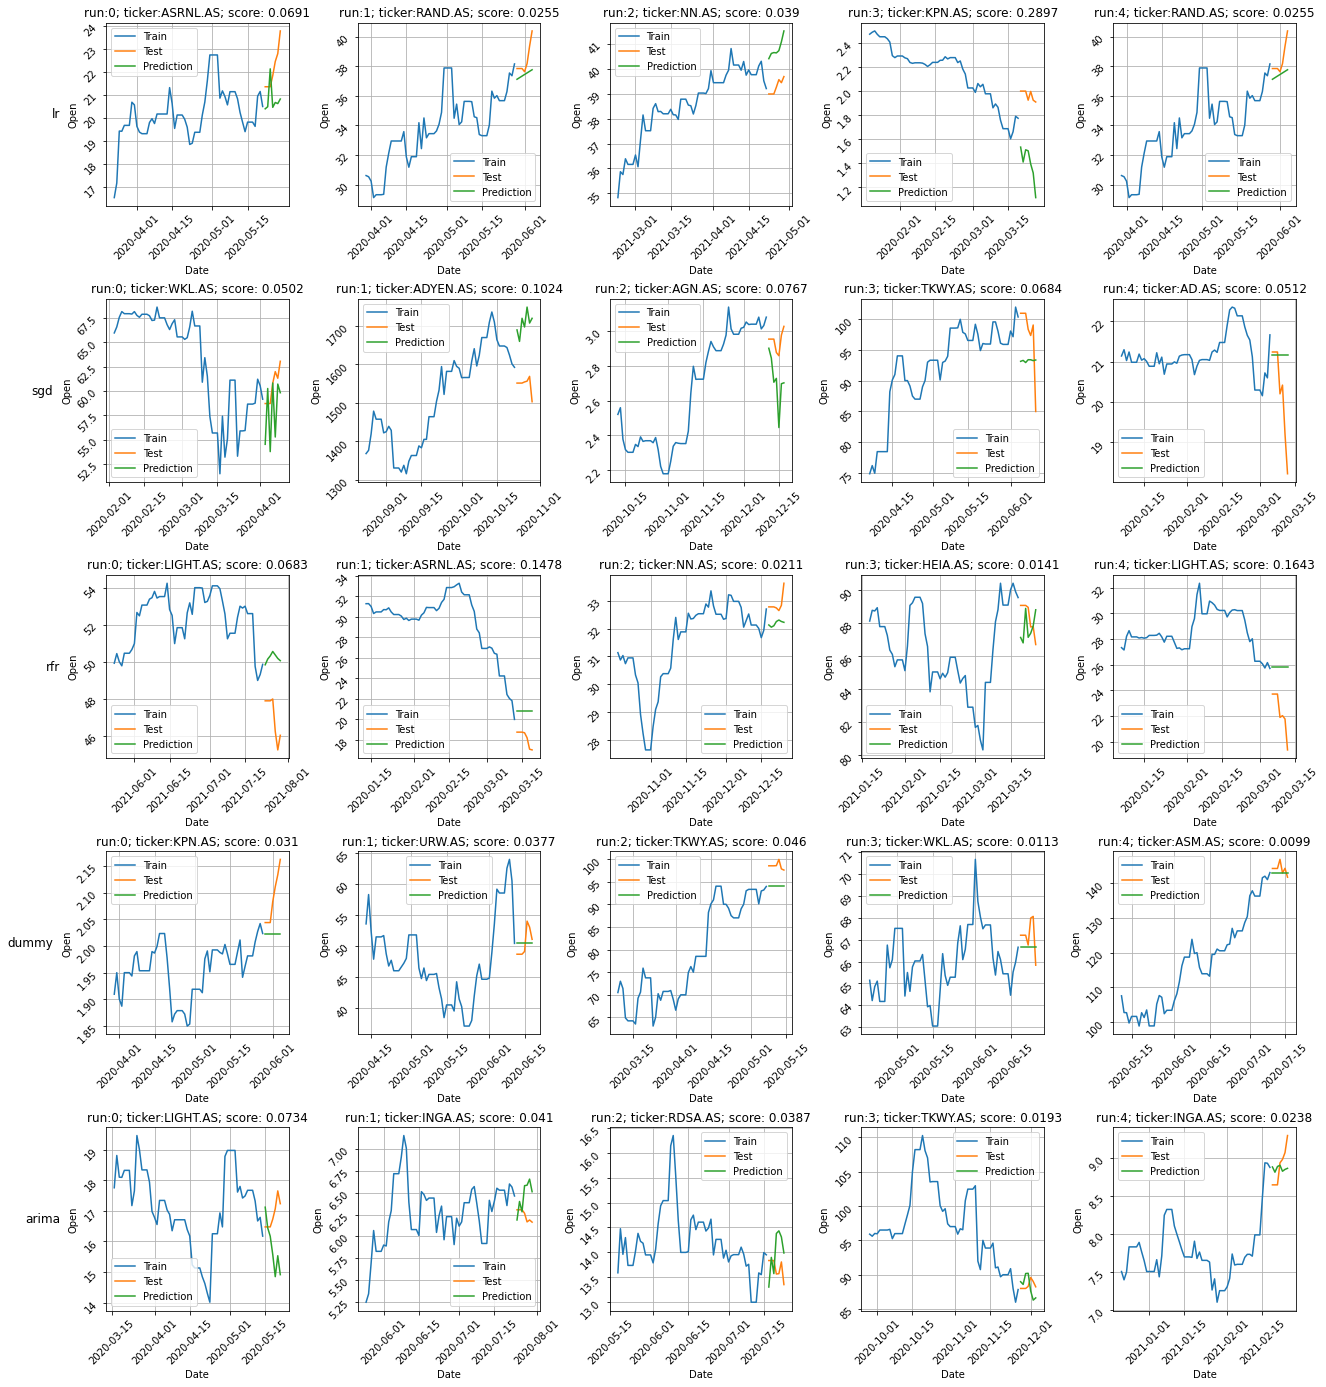

In [43]:
plot_results(daily_results, figscale=4)

In [10]:
%matplotlib inline

In [5]:
weekly_results = load_results("results/model_run_0_w_lr_rfr_sgd_arima_open_2021_08_15 20_39.json")
plot_results(weekly_results, figscale=4)

ValueError: x and y must have same first dimension, but have shapes (22,) and (4,)

In [34]:
from sklearn.linear_model import LinearRegression
# Feature selection
from sklearn.feature_selection import RFECV, SelectKBest
# Pipeline
from sklearn.pipeline import Pipeline
# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer, PowerTransformer
from sklearn.compose import ColumnTransformer
# Optimization
from sklearn.model_selection import GridSearchCV
# Scoring
from sklearn import metrics
import pandas as pd, numpy as np

In [49]:
df = sub_data(main_df, "AGN.AS", "2020-01-01", "2021-08-01")
alpha = 0.05
df = df.drop([col for col in df.columns if "dt_" in col] + ["ticker"], axis=1)

def log_transform(x):
    return np.log(x + 1)

pipeline = Pipeline([
    ('minmax', MinMaxScaler((1,1000))),
    ('log',FunctionTransformer(log_transform)),
    ('minmax2', MinMaxScaler((1,1000))),
    ('normality_transform', PowerTransformer()),
    ('scaler', MinMaxScaler((0,1))),
])
pipeline.fit(df)
df = pd.DataFrame(pipeline.transform(df), columns=df.columns)
display(df)

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,infected,deceased,open,high,low,close,volume,is_original_stockdata,open_is_increase,open_is_decrease,...,h3_policyvalue_actual,h4_policyvalue_actual,h5_policyvalue_actual,h6_policyvalue_actual,h7_policyvalue_actual,h8_policyvalue_actual,v1_policyvalue_actual,v2_policyvalue_actual,v3_policyvalue_actual,stringency_actual
0,0.000000,0.000000,0.862038,0.867878,0.870732,0.860241,0.301139,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.864672,0.855513,0.855289,0.841739,0.344598,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.864672,0.855513,0.855289,0.841739,0.344598,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.864672,0.855513,0.855289,0.841739,0.344598,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.837314,0.828654,0.819366,0.815968,0.478893,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,0.822552,0.601753,0.844446,0.846714,0.848227,0.836318,0.363007,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
574,0.857434,0.469936,0.846085,0.852112,0.850963,0.846783,0.411101,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575,0.822116,0.563672,0.849356,0.845631,0.845759,0.836318,0.415372,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
576,0.801030,0.563672,0.849356,0.845631,0.845759,0.836318,0.415372,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
%matplotlib inline

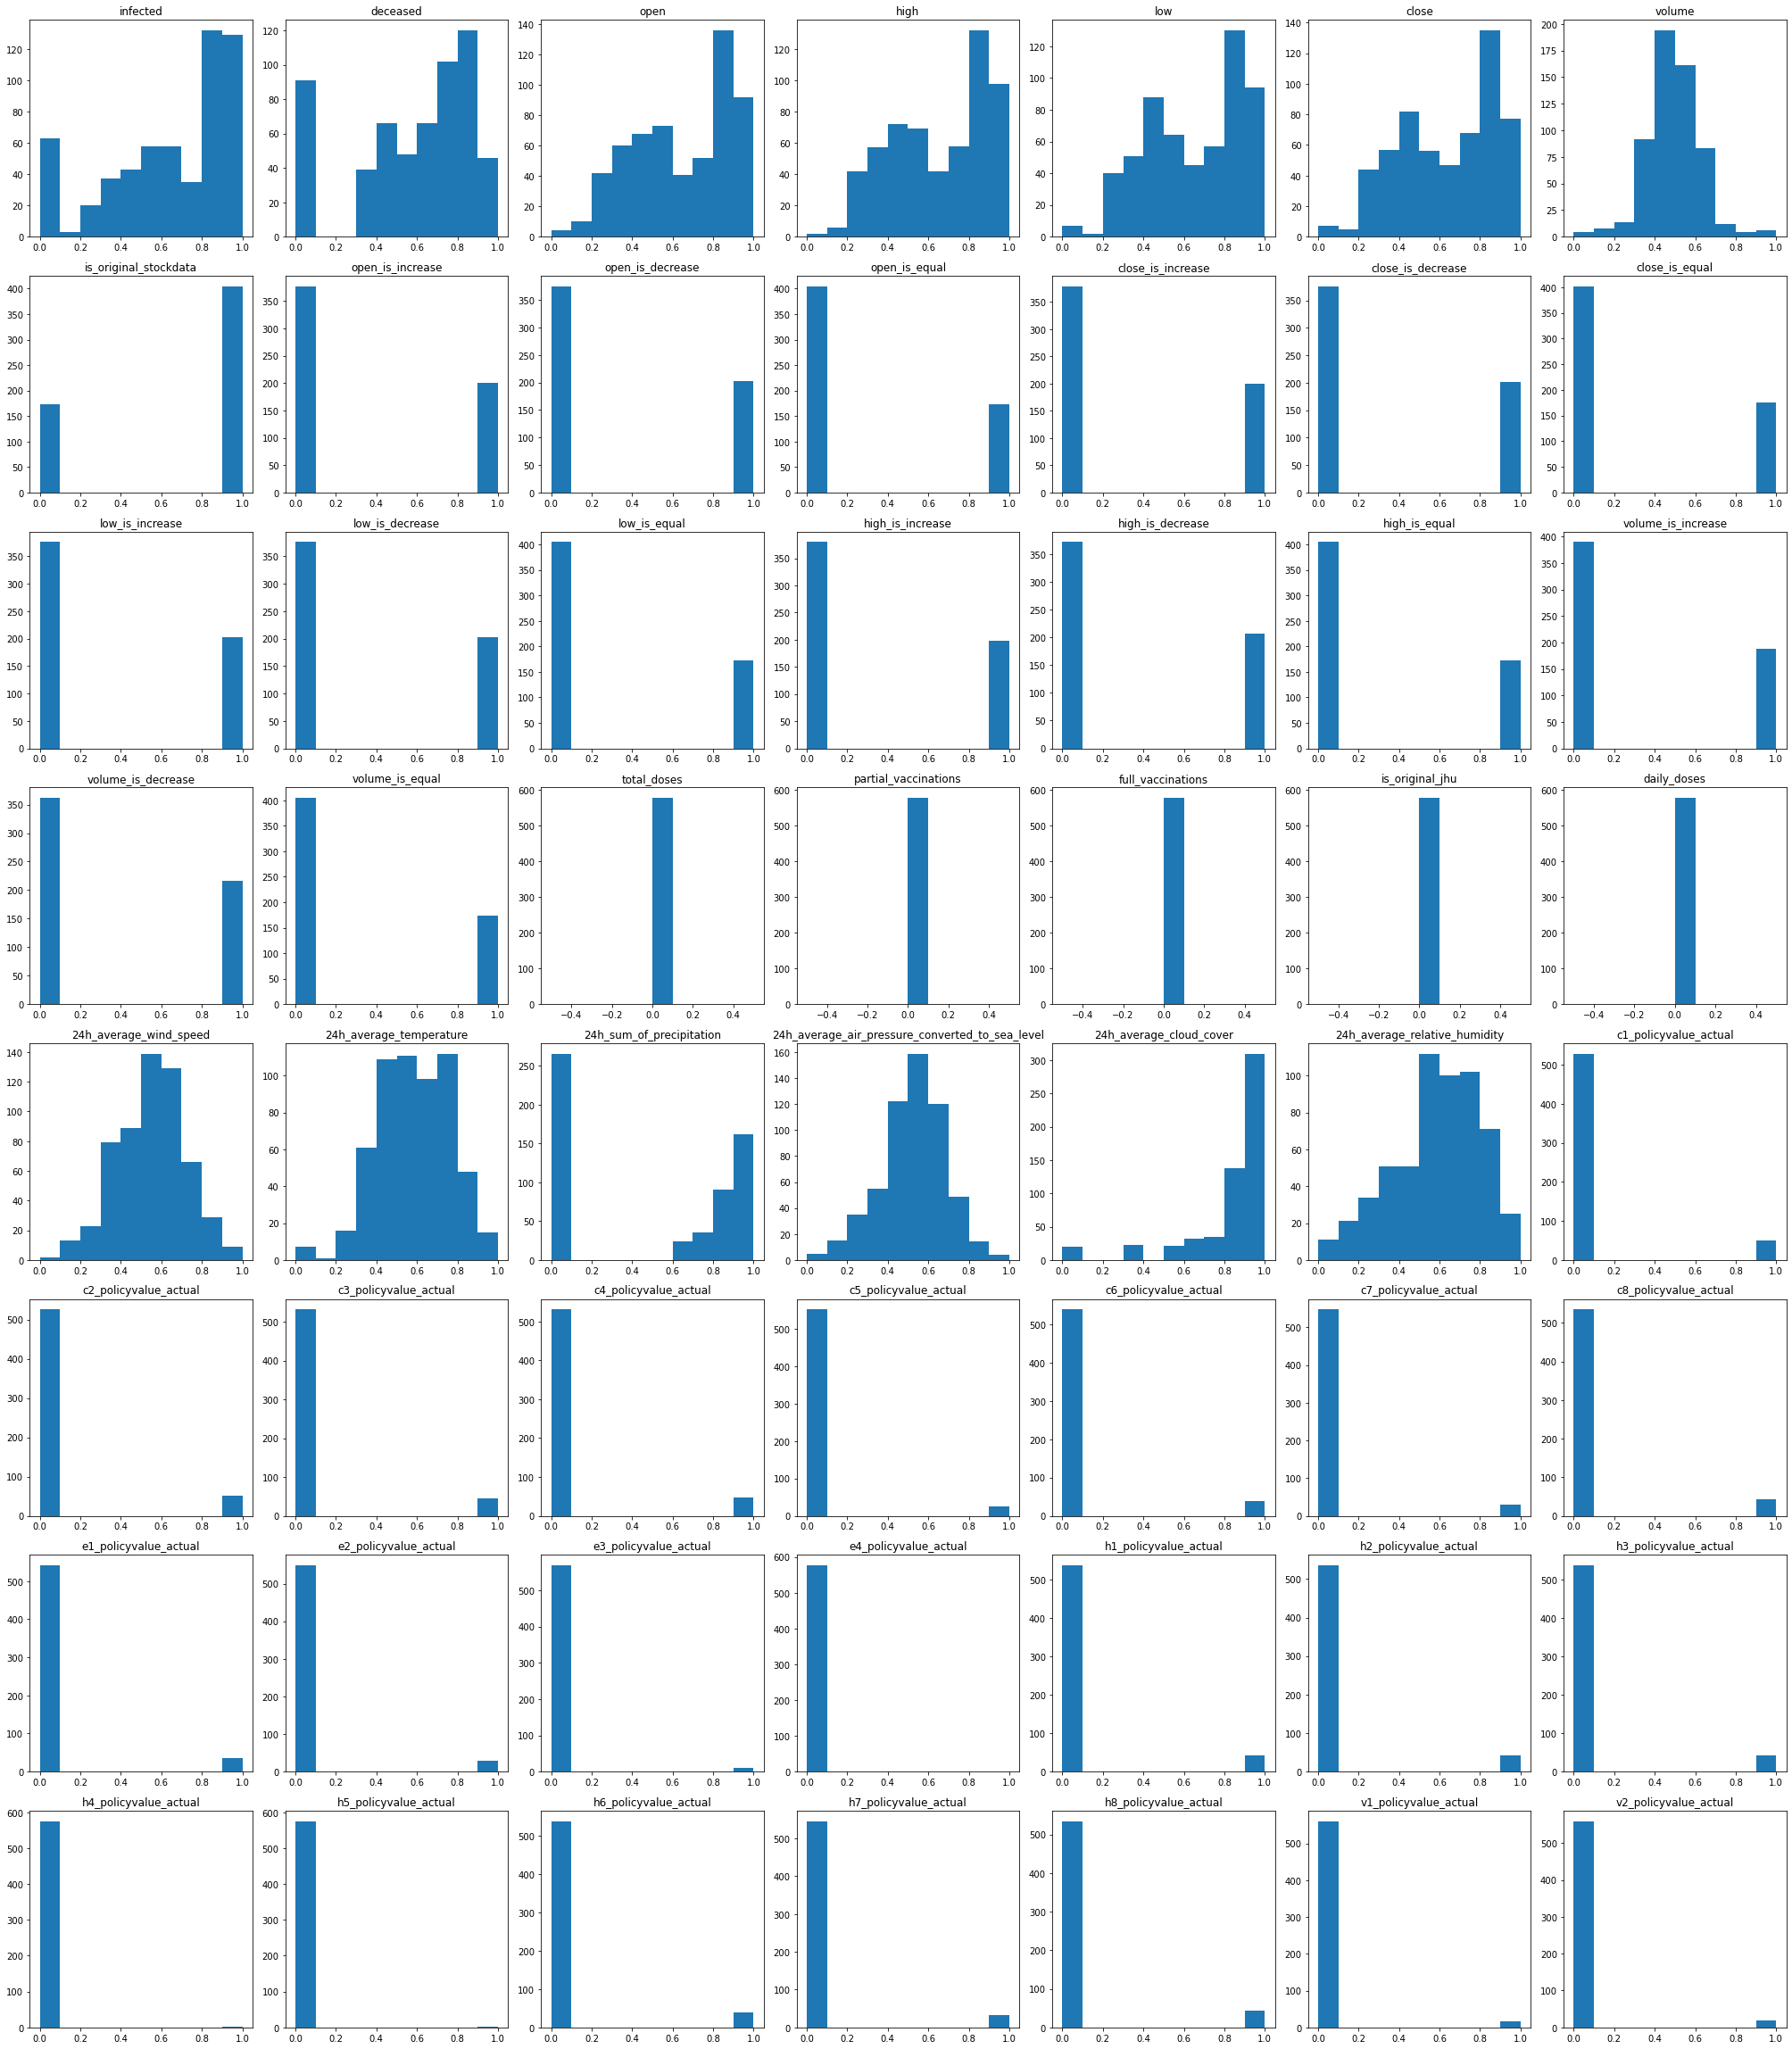

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def plot_distributions(df):
    plt_dims = (8,7)
    figscale = 4
    fig, a = plt.subplots(*plt_dims)
    a = a.ravel()
    fig.set_figheight(plt_dims[0] * figscale)
    fig.set_figwidth(plt_dims[1] * figscale)
    for idx, ax in enumerate(a):
        ax.hist(df.iloc[:,idx].astype("float"))
        ax.set_title(df.columns[idx])
        # ax.set_xlabel(xaxes[idx])
        # ax.set_ylabel(yaxes[idx])
    plt.tight_layout()
    
plot_distributions(df)

In [46]:
df = sub_data(main_df, "AGN.AS", "2020-01-01", "2021-08-01")
alpha = 0.05
df = df.drop([col for col in df.columns if "dt_" in col] + ["ticker"], axis=1)
pipeline = Pipeline([
    ('log',FunctionTransformer(np.log1p)),
    ('normality_transform', PowerTransformer()),
    ('scaler', MinMaxScaler((-1,1))),
    ('feature_selection', SelectKBest()),
    ('model', LinearRegression())
])


run = daily_results[daily_results["model"] == "lr"].loc[0]
train_start = parse_time(run["train_start"])
train_end = parse_time(run["train_end"])
test_start = parse_time(run["test_start"])
test_end = parse_time(run["test_end"])
val_start = parse_time(run["val_start"])
val_end = parse_time(run["val_end"])
ticker = run["ticker"]

response_cols = ["open", "close", "high", "low", "volume"]
X = df[[_ for _ in df.columns if _ not in response_cols]]
y = df["open"]
X_train, y_train = X[train_start:train_end].values, y[train_start:train_end].values
X_test, y_test = X[test_start:test_end].values, y[test_start:test_end].values

pipeline.fit(X_train, y_train)

fig, ax = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(6)

x_test = pd.date_range(test_start, test_end, freq="D")
ax.plot(pd.date_range(train_start, train_end, freq="D"), y_train)
ax.plot(x_test, y_test)
ax.plot(x_test, pipeline.predict(X_test))

ax.set(xlabel='Date', ylabel="Open", title=f'run:0; ticker:{ticker}; score: {round(pipeline.score(X_test, y_test), 3)}')
ax.tick_params(labelrotation=45)
ax.legend(["Train", "Test", "Prediction"])
ax.grid()


TypeError: loop of ufunc does not support argument 0 of type int which has no callable log1p method

True


<ipython-input-23-3ff475c8b249>:2: RuntimeWarning: invalid value encountered in log1p
  data = np.log1p(df["24h_average_temperature"].to_numpy().reshape(-1,1)) # infected, deceased, volume, 24h_average_wind_speed, 24h_sum_of_precipitation, total_doses, partial_vaccinations,


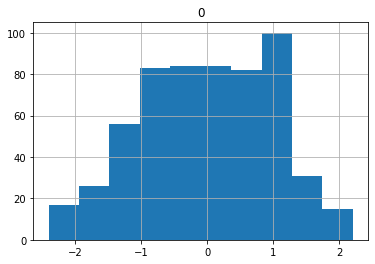

In [23]:
from scipy.stats import shapiro
data = np.log1p(df["24h_average_temperature"].to_numpy().reshape(-1,1)) # infected, deceased, volume, 24h_average_wind_speed, 24h_sum_of_precipitation, total_doses, partial_vaccinations, 
pt = PowerTransformer(method='box-cox') # 
posdata = data[data > 0]
bcdata, lam = pt.fit_transform(posdata.reshape(-1,1)), pt.lambdas_
x = np.empty_like(data).reshape(-1)
x[data.reshape(-1) > 0] = bcdata.reshape(-1)
x[data.reshape(-1) == 0] = -1/lam[0]
pd.DataFrame(x).hist()
print(shapiro(x)[1] < 0.05)

In [6]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
main_df

NameError: name 'main_df' is not defined

In [219]:
from scipy.stats import shapiro

shapiro(x)[1] < 0.05

True

In [141]:
for col in df.columns:
    print(*[col + ":", "min:" + df[col].min().astype("str"), "max:" + df[col].max().astype("str")])

infected: min:0.0 max:1.0
deceased: min:0.0 max:1.0
open: min:0.0 max:1.0
high: min:0.0 max:1.0000000000000002
low: min:0.0 max:0.9999999999999998
close: min:0.0 max:1.0
volume: min:0.0 max:1.0
is_original_stockdata: min:0.0 max:1.0
open_is_increase: min:0.0 max:1.0
open_is_decrease: min:0.0 max:1.0
open_is_equal: min:0.0 max:1.0
close_is_increase: min:0.0 max:1.0
close_is_decrease: min:0.0 max:1.0
close_is_equal: min:0.0 max:1.0
low_is_increase: min:0.0 max:1.0
low_is_decrease: min:0.0 max:1.0
low_is_equal: min:0.0 max:1.0
high_is_increase: min:0.0 max:1.0
high_is_decrease: min:0.0 max:1.0
high_is_equal: min:0.0 max:1.0
volume_is_increase: min:0.0 max:1.0
volume_is_decrease: min:0.0 max:1.0
volume_is_equal: min:0.0 max:1.0
total_doses: min:0.0 max:0.0
partial_vaccinations: min:0.0 max:0.0
full_vaccinations: min:0.0 max:0.0
daily_doses: min:0.0 max:0.0
24h_average_wind_speed: min:0.0 max:1.0
24h_average_temperature: min:0.0 max:0.9999999999999999
24h_sum_of_precipitation: min:0.0 max:1

In [124]:
from scipy.stats import shapiro

for col in df.columns:
    stat, p = shapiro(df[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=0.782, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.678, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.964, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.964, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.956, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.960, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.944, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.576, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.608, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.595, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.576, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.614, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.584, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.579, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.610, p=0.000
Sample does not look G

In [4]:
import pandas as pd

vac = pd.read_csv("data/govex/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv")

vac[vac["Country_Region"] == "Netherlands"]

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
13578,Netherlands,2021-01-17,77000,77000.0,0.0,2021/01/17,528.0,NaN
13579,Netherlands,2021-01-18,77000,77000.0,0.0,2021/01/18,528.0,NaN
13580,Netherlands,2021-01-19,77000,77000.0,0.0,2021/01/19,528.0,NaN
13581,Netherlands,2021-01-20,77000,77000.0,0.0,2021/01/20,528.0,NaN
13582,Netherlands,2021-01-21,77000,77000.0,0.0,2021/01/21,528.0,NaN
...,...,...,...,...,...,...,...,...
54907,Netherlands,2021-08-15,21348406,11881247.0,10246053.0,2021/08/16,528.0,NaN
55463,Netherlands,2021-08-16,21348406,11881247.0,10246053.0,2021/08/17,528.0,NaN
56019,Netherlands,2021-08-17,21656612,11905671.0,10532376.0,2021/08/18,528.0,NaN
56575,Netherlands,2021-08-18,21656612,11905671.0,10532376.0,2021/08/19,528.0,NaN


array([[<AxesSubplot:title={'center':'arima'}>,
        <AxesSubplot:title={'center':'dummy'}>],
       [<AxesSubplot:title={'center':'lr'}>,
        <AxesSubplot:title={'center':'rfr'}>],
       [<AxesSubplot:title={'center':'sgd'}>, <AxesSubplot:>]],
      dtype=object)

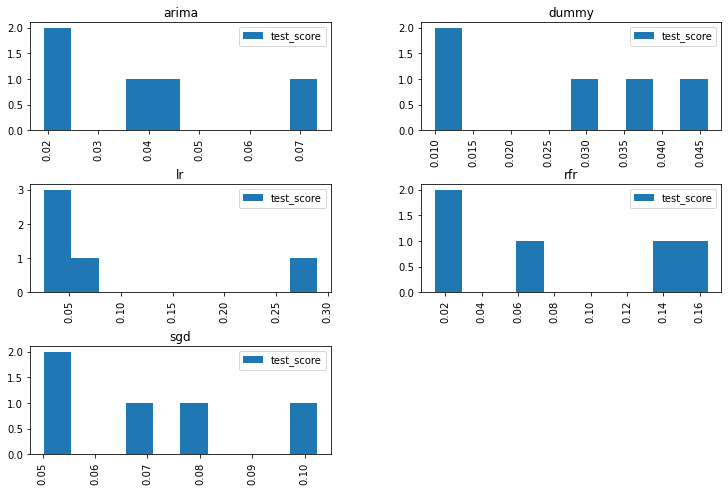

In [18]:
daily_results.test_score.hist(by=daily_results.model, legend=True, figsize=(12,8))

array([[<AxesSubplot:title={'center':'AD.AS'}>,
        <AxesSubplot:title={'center':'ADYEN.AS'}>,
        <AxesSubplot:title={'center':'AGN.AS'}>,
        <AxesSubplot:title={'center':'ASM.AS'}>],
       [<AxesSubplot:title={'center':'ASRNL.AS'}>,
        <AxesSubplot:title={'center':'HEIA.AS'}>,
        <AxesSubplot:title={'center':'INGA.AS'}>,
        <AxesSubplot:title={'center':'KPN.AS'}>],
       [<AxesSubplot:title={'center':'LIGHT.AS'}>,
        <AxesSubplot:title={'center':'NN.AS'}>,
        <AxesSubplot:title={'center':'RAND.AS'}>,
        <AxesSubplot:title={'center':'RDSA.AS'}>],
       [<AxesSubplot:title={'center':'TKWY.AS'}>,
        <AxesSubplot:title={'center':'URW.AS'}>,
        <AxesSubplot:title={'center':'WKL.AS'}>, <AxesSubplot:>]],
      dtype=object)

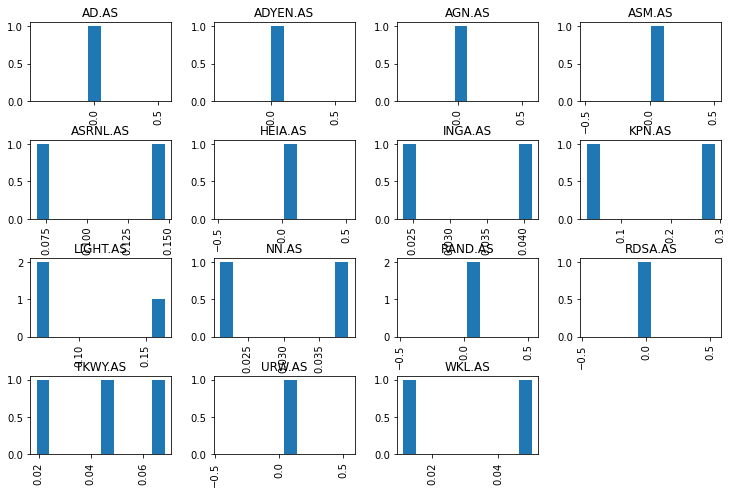

In [22]:
daily_results.test_score.hist(by=daily_results.ticker, label=daily_results.ticker, figsize=(12,8))

In [32]:
list(zip(main_df.columns.to_list(), daily_results["params.feature_selection.ranking_"][0]))

[('dt_iso_year_week',
  [2,
   9,
   1,
   3,
   13,
   1,
   7,
   8,
   5,
   17,
   1,
   16,
   14,
   12,
   15,
   1,
   4,
   11,
   6,
   19,
   10,
   18,
   1]),
 ('dt_year',
  [1, 1, 1, 1, 1, 1, 5, 4, 6, 12, 1, 15, 8, 9, 11, 1, 2, 7, 10, 13, 3, 14, 1]),
 ('dt_month', nan),
 ('dt_day', nan),
 ('dt_day_of_week',
  [14,
   16,
   13,
   9,
   12,
   15,
   11,
   8,
   10,
   1,
   7,
   1,
   5,
   1,
   6,
   1,
   2,
   4,
   3,
   1,
   1,
   1,
   1])]

In [28]:
daily_results.columns.to_list()

['model',
 'response_vars',
 'ticker',
 'train_start',
 'train_end',
 'test_start',
 'test_end',
 'val_start',
 'val_end',
 'expl_vars',
 'y_test',
 'y_pred',
 'test_score',
 'is_valid',
 'params.memory',
 'params.steps',
 'params.verbose',
 'params.feature_selection.cv',
 'params.feature_selection.estimator.copy_X',
 'params.feature_selection.estimator.fit_intercept',
 'params.feature_selection.estimator.n_jobs',
 'params.feature_selection.estimator.positive',
 'params.feature_selection.grid_scores_',
 'params.feature_selection.min_features_to_select',
 'params.feature_selection.n_features_in_',
 'params.feature_selection.ranking_',
 'params.feature_selection.scoring',
 'params.feature_selection.step',
 'params.feature_selection.verbose',
 'params.lr.coef_',
 'params.lr.fit_intercept',
 'params.lr.intercept_',
 'params.lr.n_jobs',
 'params.lr.positive',
 'params.lr.rank_',
 'params.lr.singular_',
 'params.feature_selection__cv',
 'params.feature_selection__estimator__copy_X',
 'params

In [29]:
daily_results["params.feature_selection.n_features_in_"]

id
0    23.0
1    23.0
0    23.0
1    23.0
2    23.0
3    23.0
4    23.0
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
2    23.0
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
3    23.0
4    23.0
0    23.0
1    23.0
2    23.0
3    23.0
4    23.0
Name: params.feature_selection.n_features_in_, dtype: float64

In [58]:
for col in df.columns:
    df[f"{col}_diff"] = df[col].diff().fillna(0)
df

,infected,deceased,open,high,low,close,volume,is_original_stockdata,open_is_increase,open_is_decrease,...,h3_policyvalue_actual_diff,h4_policyvalue_actual_diff,h5_policyvalue_actual_diff,h6_policyvalue_actual_diff,h7_policyvalue_actual_diff,h8_policyvalue_actual_diff,v1_policyvalue_actual_diff,v2_policyvalue_actual_diff,v3_policyvalue_actual_diff,stringency_actual_diff
0,0.000000,0.000000,0.862038,0.867878,0.870732,0.860241,0.301139,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.864672,0.855513,0.855289,0.841739,0.344598,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.864672,0.855513,0.855289,0.841739,0.344598,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.864672,0.855513,0.855289,0.841739,0.344598,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.837314,0.828654,0.819366,0.815968,0.478893,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,0.822552,0.601753,0.844446,0.846714,0.848227,0.836318,0.363007,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
574,0.857434,0.469936,0.846085,0.852112,0.850963,0.846783,0.411101,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575,0.822116,0.563672,0.849356,0.845631,0.845759,0.836318,0.415372,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
576,0.801030,0.563672,0.849356,0.845631,0.845759,0.836318,0.415372,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
def get_last_file(seed = 0, period = "d", models = ["lr", "sgd", "rfr", "dummy", "arima"], reponse = "open"):
    # Daily: results/model_run_0_d_lr_rfr_sgd_arima_open_2021_08_15 22_14.json
    # Weekly: results/model_run_0_w_lr_rfr_sgd_arima_open_2021_08_15 20_39.json
    file_mask = f"model_run_{str(seed)}_{period}_{'_'.join(sorted(models))}_{reponse}"
    return sorted([f for f in os.listdir("./results/") if file_mask in f], reverse=True)[0]

def load_results(file=get_last_file()):
    print(f"Loading file: {file}")
    results = pd.read_json(f"results/{file}")
    results.columns = ["data"]
    results = pd.json_normalize(results["data"])
    results = results.set_index("id")
    return results

def load_all_results():
    full_df = pd.DataFrame()
    for f in os.listdir("results/"):
        if ".json" in f:
            full_df = pd.concat([full_df, load_results(f)])
    return full_df.reset_index()

full_df = load_all_results()

Loading file: model_run_0_d_lr_rfr_sgd_dummy_arima_open_2021_08_29 22_07.json
Loading file: model_run_0_d_lr_rfr_sgd_dummy_arima_open_2021_09_05 15_08.json
Loading file: model_run_0_d_lr_dummy_open_2021_09_05 17_49.json
Loading file: model_run_0_d_lr_arima_open_2021_09_05 18_00.json
Loading file: model_run_0_w_lr_dummy_open_2021_09_11 15_31.json
Loading file: model_run_0_d_lr_rfr_sgd_dummy_arima_open_2021_09_11 15_58.json
Loading file: model_run_0_w_lr_rfr_sgd_dummy_arima_open_2021_09_11 16_00.json
Loading file: model_run_0_d_lr_rfr_sgd_dummy_arima_open_2021_09_12 09_56.json
Loading file: model_run_0_w_lr_rfr_sgd_dummy_arima_open_2021_09_12 09_59.json
Loading file: model_run_0_d_arima_dummy_lr_rfr_sgd_open_2021_09_12 10_10.json
Loading file: model_run_0_w_arima_dummy_lr_rfr_sgd_open_2021_09_12 10_13.json
Loading file: model_run_0_d_arima_dummy_lr_rfr_sgd_open_2021_09_12 10_34.json
Loading file: model_run_0_w_arima_dummy_lr_rfr_sgd_open_2021_09_12 11_09.json
Loading file: model_run_0_d_

In [83]:
full_df

,id,model,response_vars,ticker,train_start,train_end,test_start,test_end,val_start,val_end,...,params.sgd__loss,params.sgd__max_iter,params.sgd__n_iter_no_change,params.sgd__penalty,params.sgd__power_t,params.sgd__shuffle,params.sgd__tol,params.sgd__validation_fraction,params.sgd__verbose,params.sgd__warm_start
0,0,lr,[open],ASRNL.AS,1584921600000,1590019200000,1590105600000,1590624000000,1590710400000,1591142400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,lr,[open],RAND.AS,1585526400000,1590624000000,1590710400000,1591228800000,1591315200000,1591747200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,rfr,[open],LIGHT.AS,1621814400000,1626912000000,1626998400000,1627516800000,1627603200000,1628035200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,rfr,[open],ASRNL.AS,1578873600000,1583971200000,1584057600000,1584576000000,1584662400000,1585094400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,rfr,[open],NN.AS,1603065600000,1608163200000,1608249600000,1608768000000,1608854400000,1609286400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,3,lr,[open],REN.AS,1597017600000,1609027200000,1609113600000,1610323200000,1610409600000,1611532800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2796,3,lr,[open],AD.AS,1602460800000,1614470400000,1614556800000,1615766400000,1615852800000,1616976000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2797,3,lr,[open],INGA.AS,1604275200000,1616284800000,1616371200000,1617580800000,1617667200000,1618790400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2798,3,lr,[open],TKWY.AS,1592179200000,1604188800000,1604275200000,1605484800000,1605571200000,1606694400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


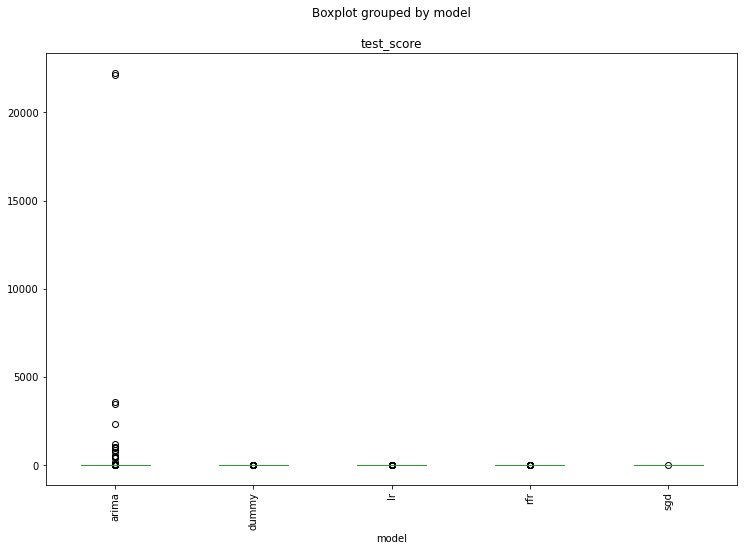

In [85]:
full_df.boxplot("test_score", by="model", figsize=(12,8), grid=False, meanline=True)
plt.xticks(rotation=90)
plt.show()

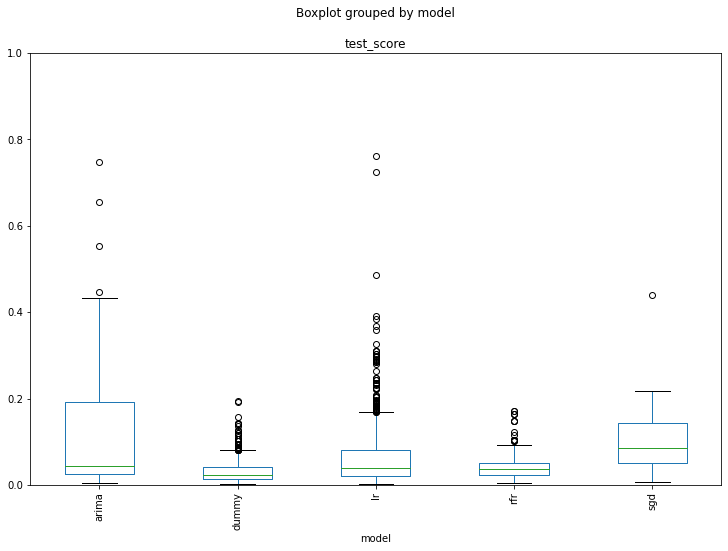

In [96]:
full_df.boxplot("test_score", by="model", figsize=(12,8), grid=False, meanline=True)
# plt.yscale("log")
plt.ylim(0,1)
plt.xticks(rotation=90)
plt.show()

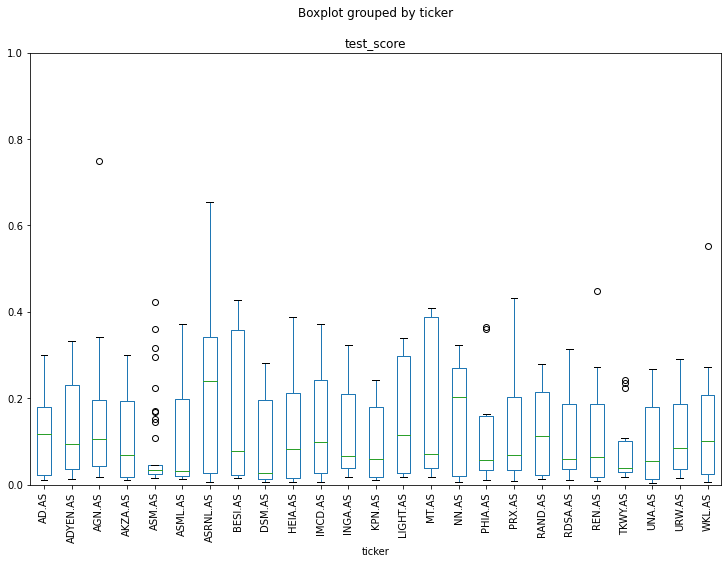

In [101]:
full_df[full_df["model"] == "arima"].boxplot("test_score", by="ticker", figsize=(12,8), grid=False, meanline=True)
# plt.yscale("log")
plt.ylim(0,1)
plt.xticks(rotation=90)
plt.show()

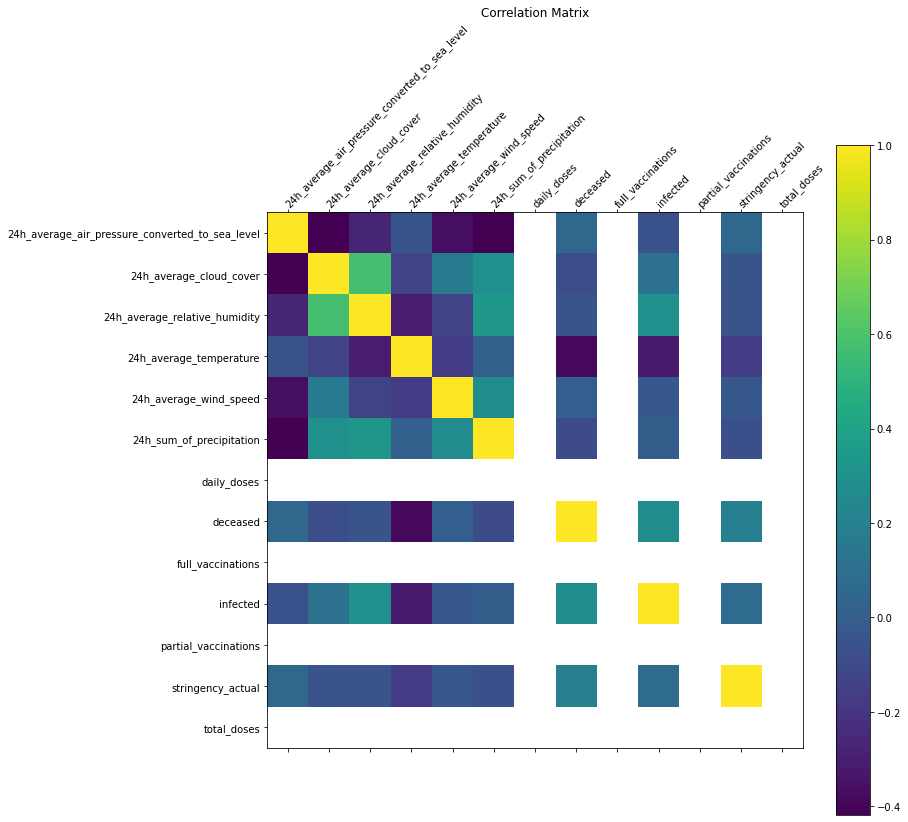

In [119]:
def get_expl_vars(df_cols, response_vars, blacklist = []):
    blacklist += ["ticker", "volume", 'is_original_stockdata', 'is_original_jhu']
    blacklist += [f"{y_col}_{incdec}" for y_col in response_vars + ["volume"] for incdec in ["is_equal", "is_increase", "is_decrease"]]
    blacklist += [col for col in df_cols if "dt_" in col]
    blacklist += [col for col in df_cols if "policyvalue_actual" in col]
    expl_vars = [col for col in df_cols if col not in response_vars and col not in blacklist]
    return sorted(list(set(expl_vars)))

expl_vars = get_expl_vars(main_df.columns, ["open","close","high","low","volume"], blacklist = [])
# expl_vars += [f"{c}_diff" for c in expl_vars]
corr_df = main_df[expl_vars]

f = plt.figure(figsize=(12, 12))
plt.matshow(corr_df.corr(), fignum=f.number)
plt.xticks(
    range(corr_df.select_dtypes(['number']).shape[1]), 
    corr_df.select_dtypes(['number']).columns, 
    fontsize=10,
    rotation=45,
    ha="left", 
    va="center", 
    rotation_mode="anchor"
)
plt.yticks(range(corr_df.select_dtypes(['number']).shape[1]), corr_df.select_dtypes(['number']).columns) # , fontsize=10
cb = plt.colorbar()
# cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=12);

In [121]:
corr_df

24h_average_air_pressure_converted_to_sea_level  \
date       ticker                                                     
2020-01-01 NaN                                              10318.0   
2020-01-02 AGN.AS                                           10238.0   
           DSM.AS                                           10238.0   
           HEIA.AS                                          10238.0   
           RDSA.AS                                          10238.0   
...                                                             ...   
2021-08-20 NN.AS                                            10163.0   
           UNA.AS                                           10163.0   
           HEIA.AS                                          10163.0   
2021-08-21 NaN                                              10168.0   
2021-08-22 NaN                                              10153.0   

                    24h_average_cloud_cover  24h_average_relative_humidity  \
date       ticker                                                            
2020-01-01 NaN                          8.0                           99.0   
2020-01-02 AGN.AS                       8.0                           95.0   
           DSM.AS                       8.0                           95.0   
           HEIA.AS                      8.0                           95.0   
           RDSA.AS                      8.0                           95.0   
...                                     ...                            ...   
2021-08-20 NN.AS                        6.0                           85.0   
           UNA.AS                       6.0                           85.0   
           HEIA.AS                      6.0                           85.0   
2021-08-21 NaN                          8.0                           84.0   
2021-08-22 NaN                          8.0                           92.0   

                    24h_average_temperature  24h_average_wind_speed  \
date       ticker                                                     
2020-01-01 NaN                            8                    27.0   
2020-01-02 AGN.AS                        39                    41.0   
           DSM.AS                        39                    41.0   
           HEIA.AS                       39                    41.0   
           RDSA.AS                       39                    41.0   
...                                     ...                     ...   
2021-08-20 NN.AS                        175                    22.0   
           UNA.AS                       175                    22.0   
           HEIA.AS                      175                    22.0   
2021-08-21 NaN                          187                    18.0   
2021-08-22 NaN                          179                    31.0   

                    24h_sum_of_precipitation  daily_doses  deceased  \
date       ticker                                                     
2020-01-01 NaN                           0.0          0.0         0   
2020-01-02 AGN.AS                        0.0          0.0         0   
           DSM.AS                        0.0          0.0         0   
           HEIA.AS                       0.0          0.0         0   
           RDSA.AS                       0.0          0.0         0   
...                                      ...          ...       ...   
2021-08-20 NN.AS                         0.0          0.0         6   
           UNA.AS                        0.0          0.0         6   
           HEIA.AS                       0.0          0.0         6   
2021-08-21 NaN                         119.0          0.0         8   
2021-08-22 NaN                         188.0          0.0         6   

                    full_vaccinations  infected  partial_vaccinations  \
date       ticker                                                       
2020-01-01 NaN                      0         0                     0   
2020-01-02 AGN